In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import pi, log, arctan, sqrt

mpl.style.use('http://tiny.cc/leheny-style-sans-serif/raw')

The mobility of an inclusion in a membrane was first determined by [Saffman and Delbruck](http://dx.doi.org/10.1073/pnas.72.8.3111).

$\displaystyle\frac{1}{\zeta} = \frac{1}{4\pi\eta_s}\left(\log(\text{Bo}) - \gamma\right)$

In [9]:
EULER = 0.577

def saffman(Bo, eta, a):
    "Compute drag (not inverse drag)"
    eta_s = eta * a * Bo
    return (4 * pi * eta_s) * 1/(log(Bo) - EULER)

Saffman is invalid at low Bo. When $\log(\text{Bo}) < \gamma$, ($\text{Bo} \sim 1.7$) it gives $D < 0$. A more general form was worked out by Hughes and reduced to a nice closed form by [Petrov and Schwille](10.1529/biophysj.107.126565).

Define "reduced radius" (i.e., inverse Bossinesq number) $\epsilon = \displaystyle a\frac{\mu_1 + \mu_2}{\eta_s}$ where $\mu_1$ and $\mu_2$ are bulk viscosities of the subphase and superphase.


\begin{align}
\displaystyle\frac{1}{\zeta} &= \frac{1}{4\pi\eta_s}\\
    &\times\ \log(2/\epsilon) - \gamma + 4\epsilon/\pi - (\epsilon^2/2)\log(2/\epsilon)\\
&\times\ \left[1 - (\epsilon^2/\pi)\log(2/\epsilon) + c_1\epsilon^{b_1}/(1 + c_2\epsilon^{b_2})\right]^{-1}
\end{align}

In [3]:
C1 = 0.73761
B1 = 2.74819
C2 = 0.52119
B2 = 0.61465

def petrov(Bo, eta, a):
    "Compute drag (not inverse drag)."
    ep = 1/Bo
    eta_s = eta * a * Bo
    prefactor = 1/(4 * pi * eta_s)
    factor1 = log(2/ep) - EULER + 4*ep/pi - ep**2/2*log(2/ep)
    factor2 = (1 - ep**2/pi*log(2/ep) + C1*ep**B1/(1 + C2*ep**B2))**-1
    return 1/(prefactor*factor1*factor2)

[Fischer](http://dx.doi.org/10.1017/S002211200600022X)


  $$\zeta = \eta a (k^{(0)} + \text{Bo}\, k^{(1)} + o(\text{Bo}^2))$$

with coefficients (within 3\% accuracy)

\begin{align}
  k^{(0)} &\approx 6\pi\sqrt{\tanh[32(d/a + 2)/9\pi^2}\\
  k^{(1)} &\approx -4\ln\left(\frac{2}{\pi}\tan^{-1}\left(\frac{d + 2a}{3a}\right)\right)
\end{align}

where $\eta$ is the viscosity of the bulk phase, $a$ is the length scale of the particle (e.g., radius), and $d$ is the distance from the apex of the particle to the level of the interface; $d$ is defined to be positive when the particle is fully submerged and negative when the particle is embedded.

In the opposite limit, Bo $\gg 1$,

\begin{equation}
  \zeta = \eta a \left(\frac{4\pi\text{Bo}}{\ln(\text{Bo}\, a/a_s) - \gamma}\right).
\end{equation}

In [13]:
def fischer_low(Bo, eta, a, contact_angle):
    d = a * (np.cos(np.deg2rad(contact_angle)) - 1)
    k0 = 6 * pi * sqrt(arctan(32 * (d/a + 2)/(9*pi**2)))
    k1 = -4 * log(2/pi * arctan((d/a + 2)/3))
    return eta * a * (k0 + Bo*k1)

def fischer_high(Bo, eta, a, contact_angle):
    if contact_angle != 90:
        raise NotImplementedError  # TODO write general expression for a_s and relax this
    return eta * a  * (4 * np.pi * Bo)/(log(Bo * np.sin(contact_angle)) - EULER)

Plotting $D = \displaystyle\frac{kT}{\zeta}$ vs. $Bo$

In [41]:
kT = 4.1e-21
Bo = np.logspace(-2, 4, num=300, base=10)

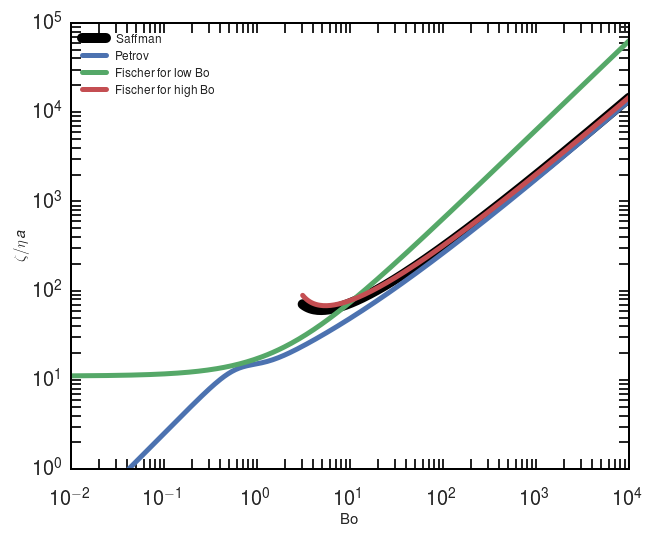

In [42]:
a = 0.5e-6
eta = 1e-3
contact_angle = 90  # degrees

s = saffman(Bo, eta, a)/(eta * a)
fh = fischer_high(Bo, eta, a, contact_angle)/(eta * a)

fig, ax = plt.subplots()
ax.plot(Bo[Bo > 3], s[Bo > 3], label='Saffman', color='k', lw=10)
ax.plot(Bo, (petrov(Bo, eta, a)/(eta * a)), label='Petrov')
ax.plot(Bo, fischer_low(Bo, eta, a, contact_angle)/(eta * a), label='Fischer for low Bo')
ax.plot(Bo[Bo > 3], fh[Bo > 3], label='Fischer for high Bo')
ax.legend(loc='upper left')
ax.set(xscale='log', yscale='log', ylabel=r'$\zeta/\eta a$', xlabel='Bo')
ax.set(ylim=(1,1e5), xlim=(1e-2, 1e4))
fig.savefig('figs/introduction/drag-models.eps')